<a href="https://colab.research.google.com/github/0bsidian03/CompPhysProjects/blob/main/Ising_model_of_boiling_water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

In [ ]:

class IsingModel:
    def __init__(self, size, temperature):
        self.size = size
        self.T = temperature
        self.lattice = np.full((size, size), fill_value=1)

    def energy(self):
        E = 0
        for i in range(self.size):
            for j in range(self.size):
                S = self.lattice[i, j]
                neighbors = self.lattice[(i+1) % self.size, j] + \
                           self.lattice[i, (j+1) % self.size] + \
                           self.lattice[(i-1) % self.size, j] + \
                           self.lattice[i, (j-1) % self.size]

                E += -S * neighbors

        return E / 2.0

    def evaporation(self):

        return np.sum(self.lattice)

    def monte_carlo_step(self):

        for _ in range(self.size**2):
            i = np.random.randint(0, self.size)
            j = np.random.randint(0, self.size)
            S = self.lattice[i, j]
            neighbors = self.lattice[(i+1) % self.size, j] + \
                       self.lattice[i, (j+1) % self.size] + \
                       self.lattice[(i-1) % self.size, j] + \
                       self.lattice[i, (j-1) % self.size]

            dE = 2 * S * neighbors


            if dE < 0 or np.random.random() < np.exp(-dE / self.T):
                self.lattice[i, j] = -S

    def simulate(self, n_steps, measure_interval=1):
        energies = []
        evaporations = []

        for step in range(n_steps):
            self.monte_carlo_step()

            if step % measure_interval == 0:
                energies.append(self.energy())
                evaporations.append(abs(self.evaporation()))

        return energies, evaporations





/tmp/ipython-input-349215728.py:39: RuntimeWarning: divide by zero encountered in scalar divide
  if dE < 0 or np.random.random() < np.exp(-dE / self.T):


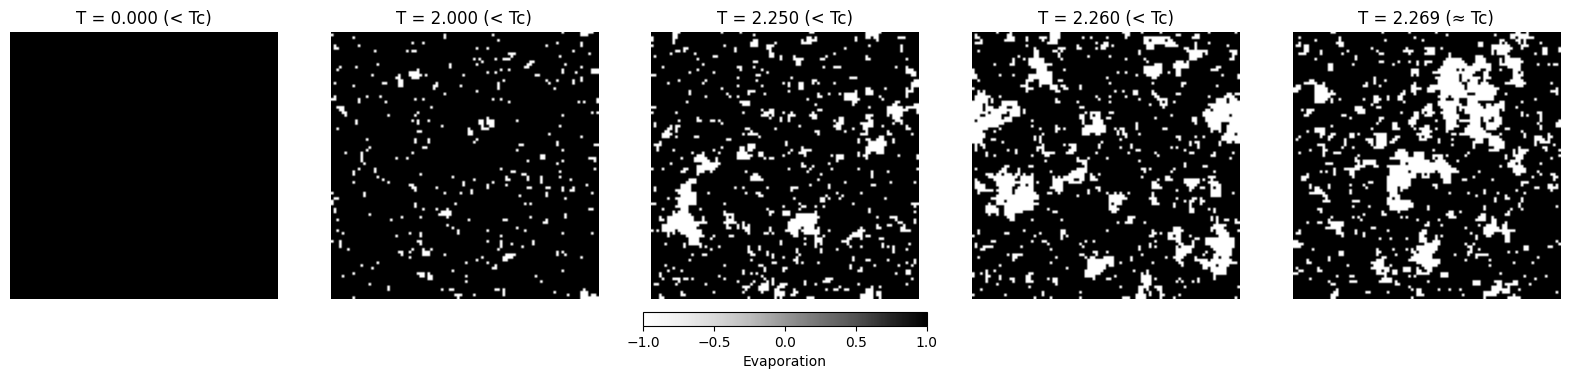

In [ ]:
size = 100
n_equilibration = 1000
temperatures = [0,2.0,2.25,2.26, 2.269]

fig, axes = plt.subplots(1, len(temperatures), figsize=(20, 4))

for idx, T in enumerate(temperatures):
    model = IsingModel(size, T)

    for _ in range(n_equilibration):
        model.monte_carlo_step()

    im = axes[idx].imshow(model.lattice, cmap='Greys', vmin=-1, vmax=1)
    axes[idx].set_title(f'T = {T:.3f}' + (' (< Tc)' if T < 2.269 else ' (> Tc)' if T > 2.269 else ' (≈ Tc)'))
    axes[idx].axis('off')

plt.colorbar(im, ax=axes, orientation='horizontal', fraction=0.046, pad=0.04, label='Evaporation')
plt.show()


array([[<Axes: title={'center': 'Energy Evolution (T=2.0)'}, xlabel='Monte Carlo Step', ylabel='Energy'>,
        <Axes: title={'center': 'Evaporation Evolution (T=2.0)'}, xlabel='Monte Carlo Step', ylabel='Evaporation per "spin"'>],
       [<Axes: title={'center': 'Energy Evolution (T=2.269)'}, xlabel='Monte Carlo Step', ylabel='Energy'>,
        <Axes: title={'center': 'Evaporation Evolution (T=2.269)'}, xlabel='Monte Carlo Step', ylabel='Evaporation per "spin"'>]],
      dtype=object)

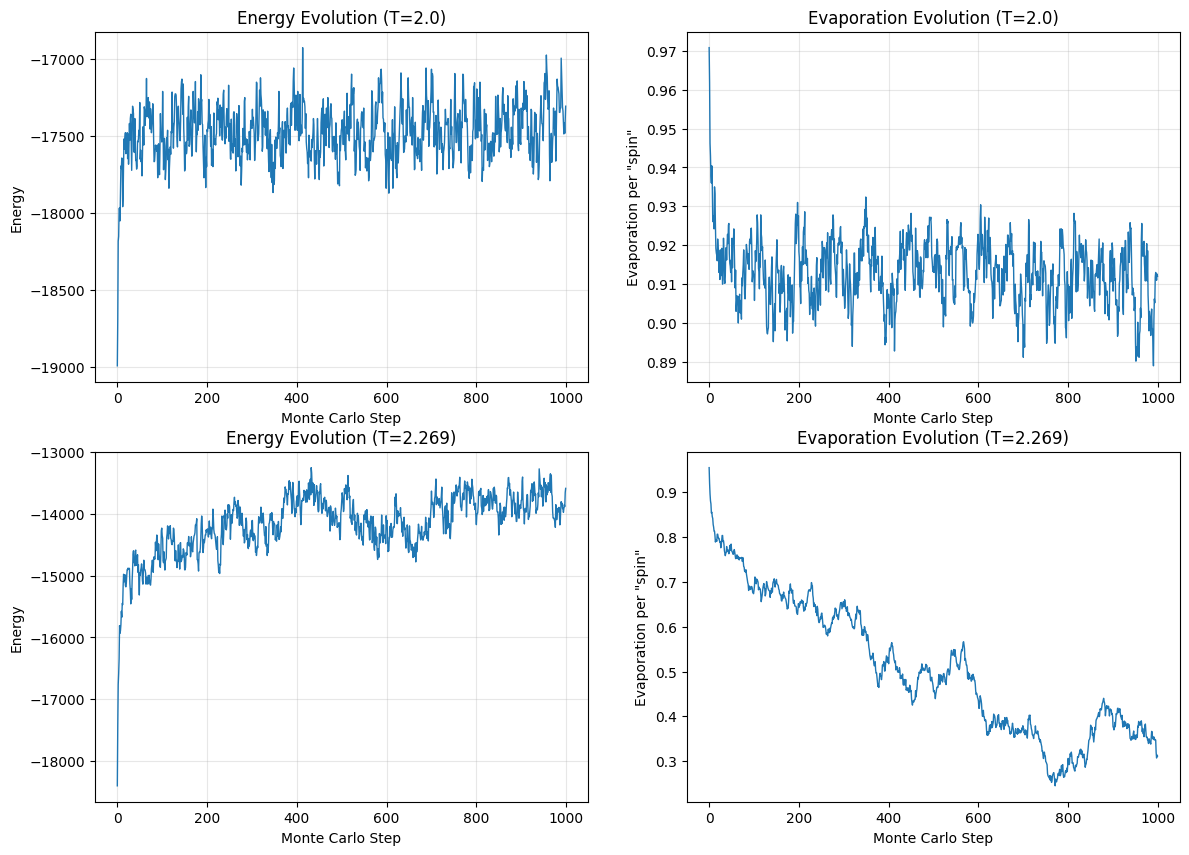

In [ ]:
size=100
Tlow=2.0
Thigh=2.269
n_steps=1000

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

modellow=IsingModel(size,Tlow)
energieslow,evaporationslow=modellow.simulate(n_steps)

axes[0, 0].plot(energieslow, linewidth=1)
axes[0, 0].set_xlabel('Monte Carlo Step')
axes[0, 0].set_ylabel('Energy')
axes[0, 0].set_title(f'Energy Evolution (T={Tlow})')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 1].plot(np.array(evaporationslow) / size**2, linewidth=1)
axes[0, 1].set_xlabel('Monte Carlo Step')
axes[0, 1].set_ylabel('Evaporation per "spin"')
axes[0, 1].set_title(f'Evaporation Evolution (T={Tlow})')
axes[0, 1].grid(True, alpha=0.3)

modelhigh=IsingModel(size,Thigh)
energieshigh,evaporationshigh=modelhigh.simulate(n_steps)

axes[1, 0].plot(energieshigh, linewidth=1)
axes[1, 0].set_xlabel('Monte Carlo Step')
axes[1, 0].set_ylabel('Energy')
axes[1, 0].set_title(f'Energy Evolution (T={Thigh})')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 1].plot(np.array(evaporationshigh) / size**2, linewidth=1)
axes[1, 1].set_xlabel('Monte Carlo Step')
axes[1, 1].set_ylabel('Evaporation per "spin"')
axes[1, 1].set_title(f'Evaporation Evolution (T={Thigh})')
axes

